


# Investigate No-ShowAppointment Dataset 
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Dataset Description**:
First of all, we are going to discuss the chosen dataset which is No-ShowAppointment provided by Kaggle on this [Link](https://www.kaggle.com/joniarroba/noshowappointments).This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

> **Dataset Columns**:
    <ol>
    <li>**PatientId**:Identification of a patient </li>
    <li>**AppointmentID**: Identification of each appointment </li>
    <li>**Gender**: Male or Female </li>
    <li>**ScheduledDay**: what day the patient set up their appointment</li>
    <li>**AppointmentDay**: The day someone called or registered the appointment</li>
    <li>**Age**: How old is the patient</li>
    <li>**Neighborhood**: indicates the location of the hospital,Where the appointment takes place </li>
     <li>**Scholarship**: indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família </li>
    <li>**Hipertension**: True or False </li>
    <li>**Diabetes**: True or False </li>
    <li>**Alcoholism**: True or False </li>
    <li>**Handcap**: 0,1,2,3,4 [Check This](https://www.kaggle.com/joniarroba/noshowappointments/discussion/29699#229356) </li>
    <li>**SMS_received**: message sent to the patient </li>
    <li>**No-show**: True or False, Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment and ‘Yes’ if they did not show up.
     </li>
  
> **Dataset Questions**: Based on some observations we will try to answer these questions
  <ol>
    <li>Which **gender** takes way more care of they health in comparison to the other gender ?</li>
    <li>Which **gender** place an appointement and **Show/No-Show** to the appointement the most?</li>
    <li>Which **month/weekday** the most appointments are scheduled?</li>
    <li>Which **month/weekday** the most appointments are getting finalized with **Show status?**</li>
    <li>Is there **age** difference in having a patient to be with **Show/No-Show** status?</li>
    <li>Does sending **SMS** affect the **Show/No-Show** status?</li>
    <li>Is the **scholarship** provided by the country affects the patient's life ? </li>
    <li>Which **neighborhood**(hospital) is having the most reservations ?</li>
    <li>Which **neighborhood**(hospital) is having the most reservations with **Show** status ?</li>
    <li>Any specific **health condition** that makes the patient **shows** to the appointement ? </li>
    <li>What **factors** are important in order to predict if a patient will show up for their scheduled appointment?</li>
    
> **Please note that the last question will be discussed in the conclusion section based on the information we learn during answering the questions**
 

In [1]:
# import statements for all of the packages that we will use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

>In this section of the report we will cover:
    <ol>
        <li>Load in the data  </li>
        <li>Check for cleanliness </li>
        <li>Trim and clean the dataset </li>

The first step to begin with is the loading stage for our CSV file

In [2]:
# Load the data
appoin_df=pd.read_csv('noshowappointments.csv')
# Make sure we load the data correctly 
appoin_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Next, we will try to understand our dataset in a more clear way as below:

In [3]:
# checking the shape of the dataset
appoin_df.shape

(110527, 14)

As we can see I have 110527 rows and 14 columns 

In [4]:
# checking the data types of each column
appoin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


From the last step we may say:
<ol>
    <li>No null entries in the dataset as we can see, however i am going to confirm this info in the next step</li> 
    <li>I have 8 int columns, 5 string columns, 1 float column</li>
    <li>I am going to drop the PatientId,AppointmentID columns as these wont help during our investigations</li>
    <li>I will need to rename the No-show column to Show for consistency</li>
    <li>I will convert the column of No-show to be 0/1 with 0 = patient does not go and 1 = patient goes</li>
    <li>I am going to examine each column's values more precisely and see if a modification is required </li>
    <li>Checking for duplicates</li>
    <li>Summary statistics</li>

In [5]:
# checking For null values
appoin_df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

No null entries, confirmed

In [6]:
# Drop the patientid, AppointmentID columns and re-check our data has been modified
appoin_df.drop(['PatientId','AppointmentID'],inplace=True, axis=1)
appoin_df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
# Re-namme no-show column and re-check our data has been modified
appoin_df.rename(columns={"No-show": "Show"},inplace=True)
appoin_df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [8]:
# Convert the column of No-show to be 0/1 
# Before changing, I will make sure that the values are Yes/No only
appoin_df['Show'].value_counts()

No     88208
Yes    22319
Name: Show, dtype: int64

In [9]:
# Using apply, we will change the row to be 0/1 based on the stored value and re-check our data has been modified
appoin_df['Show']=appoin_df['Show'].apply(lambda row: 1 if (row=='No') else (0 if row=='Yes' else row))
appoin_df['Show'].value_counts()

1    88208
0    22319
Name: Show, dtype: int64

In [10]:
# Examine Gender column
appoin_df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

As we can see, the age column has 'F' and 'M'values only.So, this column is okay

In [11]:
# Examine SMS_received column
appoin_df['SMS_received'].value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

As we can see, the SMS_received column has '0' and '1' values only.So, this column is okay

In [12]:
# Examine Handcap column
appoin_df['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

As we can see, the Handcap column has '0','1','2','3','4' values.So, this column is okay. You may need to re-check the link provided about this column in the introduction section to understand why the values are from 0 to 4

In [13]:
# Examine Alcoholism column
appoin_df['Alcoholism'].value_counts()

0    107167
1      3360
Name: Alcoholism, dtype: int64

As we can see, the Alcoholism column has '0' and '1' values only.So, this column is okay

In [14]:
# Examine Diabetes column
appoin_df['Diabetes'].value_counts()

0    102584
1      7943
Name: Diabetes, dtype: int64

As we can see, the Diabetes column has '0' and '1' values only.So, this column is okay

In [15]:
# Examine Hipertension column
appoin_df['Hipertension'].value_counts()

0    88726
1    21801
Name: Hipertension, dtype: int64

As we can see, the Hipertension column has '0' and '1' values only.So, this column is okay

In [16]:
# Examine Scholarship column
appoin_df['Scholarship'].value_counts()

0    99666
1    10861
Name: Scholarship, dtype: int64

As we can see, the Scholarship column has '0' and '1' values only.So, this column is okay

In [17]:
# Examine Neighbourhood column
appoin_df['Neighbourhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
CENTRO                         3334
TABUAZEIRO                     3132
SANTA MARTHA                   3131
JESUS DE NAZARETH              2853
BONFIM                         2773
SANTO ANTÔNIO                  2746
SANTO ANDRÉ                    2571
CARATOÍRA                      2565
JABOUR                         2509
SÃO PEDRO                      2448
ILHA DO PRÍNCIPE               2266
NOVA PALESTINA                 2264
ANDORINHAS                     2262
DA PENHA                       2217
ROMÃO                          2215
GURIGICA                       2018
SÃO JOSÉ                       1977
BELA VISTA                     1907
MARUÍPE                        1902
FORTE SÃO JOÃO                 1889
ILHA DE SANTA MARIA            1885
SÃO CRISTÓVÃO                  1836
REDENÇÃO                    

I really dont know any hospitals in Barazil, so i am going to assume that the names of these hospitals are correct

In [18]:
# Examine Age column
appoin_df['Age'].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
 56     1635
 38     1629
 59     1624
 2      1618
 50     1613
 57     1603
 36     1580
 51     1567
 19     1545
 39     1536
 37     1533
 54     1530
 34     1526
 33     1524
 30     1521
 6      1521
 3      1513
 17     1509
 32     1505
 5      1489
 44     1487
 18     1487
 58     1469
 46     1460
 45     1453
        ... 
 74      602
 76      571
 75      544
 78      541
 77      527
 80      511
 81      434
 82      392
 79      390
 84      311
 83      280
 85      275
 86      260
 87      184
 89      173
 88      126
 90      109
 92       86
 91       66
 93       53
 94       33
 95       24
 96       17
 97       11
 98        6
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

The age column needs more investigations as there are values like(0,-1)

In [19]:
# getting unique values in age column
appoin_df['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

As we can see, the age -1 and 0 can not be used in our analysis.So, i am going to drop these rows( around 3540 rows)

In [20]:
# Drop age 0 and -1 and re-check our data has been modified
appoin_df.drop(appoin_df[appoin_df['Age'] < 1].index, inplace = True)
appoin_df.shape

(106987, 12)

In [21]:
# Examine ScheduledDay column
appoin_df['ScheduledDay'].head()

0    2016-04-29T18:38:08Z
1    2016-04-29T16:08:27Z
2    2016-04-29T16:19:04Z
3    2016-04-29T17:29:31Z
4    2016-04-29T16:07:23Z
Name: ScheduledDay, dtype: object

I am going to separte the ScheduledDay into 3 separate columns: one for day, one for the month and the last one is for weekday. The year will be ignored as all the values are for 2016

In [22]:
# Converting ScheduledDay column and re-check our data has been modified
# The day of the week with Monday=0, Sunday=6
appoin_df['ScheduledDay'] = appoin_df['ScheduledDay'].apply(np.datetime64)
appoin_df['Day_Scheduled'] = appoin_df['ScheduledDay'].dt.day
appoin_df['weekday_Scheduled'] = appoin_df['ScheduledDay'].dt.dayofweek
appoin_df['Month_Scheduled'] = appoin_df['ScheduledDay'].dt.month
appoin_df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show,Day_Scheduled,weekday_Scheduled,Month_Scheduled
0,F,2016-04-29 18:38:08,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1,29,4,4
1,M,2016-04-29 16:08:27,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1,29,4,4
2,F,2016-04-29 16:19:04,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,1,29,4,4
3,F,2016-04-29 17:29:31,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,29,4,4
4,F,2016-04-29 16:07:23,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,1,29,4,4


In [23]:
# i am going to change the weekday_Scheduled from 0 to 6, to Sat to Friday for better inspection 
# first,, i am going to define a dict
dict_weekday={
    0:'Mon',
    1:'Tues',
    2:'Wed',
    3:'Thur',
    4:'Frid',
    5:'Sat',
    6:'Sun',
}

In [24]:
# Second, i am going to Map values
appoin_df['weekday_Scheduled']=appoin_df['weekday_Scheduled'].apply(lambda row : dict_weekday.get(row))

In [25]:
# Examine weekday_Scheduled column after changes
appoin_df['weekday_Scheduled'].value_counts()

Tues    25280
Wed     23544
Mon     22247
Frid    18374
Thur    17520
Sat        22
Name: weekday_Scheduled, dtype: int64

In [26]:
# Checking for duplicated rows 
sum(appoin_df.duplicated(subset=None, keep='first'))

626

In [27]:
# Removing duplicated rows
appoin_df.drop_duplicates(subset=None, keep='first', inplace=True)

In [28]:
# Recheck again for duplicates 
sum(appoin_df.duplicated(subset=None, keep='first'))

0

In [29]:
appoin_df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show,Day_Scheduled,Month_Scheduled
count,106361.000000,106361.000000,106361.000000,106361.000000,106361.000000,106361.000000,106361.000000,106361.000000,106361.000000,106361.000000
mean,38.320822,0.101061,0.203797,0.074210,0.031440,0.022856,0.325166,0.798216,14.227734,4.827258
std,22.475574,0.301412,0.402821,0.262113,0.174505,0.163448,0.468439,0.401334,9.341959,0.715981
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,4.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,13.000000,5.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,21.000000,5.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,31.000000,12.000000


From the examination of the above table, we can say that the values don't show any suspicious flags.So, i am going to stop the wrangling phase and start the EDA.Before we shift to the EDA, let's save our the work to new exceel sheet.

In [30]:
appoin_df.to_csv('noshowappointments_cleaned.csv', index = False)

<a id='eda'></a>
## Exploratory Data Analysis

> Now that we have trimmed and cleaned our data, we are ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that I posed in the Introduction section.

>So, what we are going to do can be summarized in the next steps
    <ol>
        <li>Load the cleaned data</li>
        <li>Answering the questions </li>

In [31]:
# Load the cleaned data and check if we load it correctly
appoin_cleaned_df=pd.read_csv('noshowappointments_cleaned.csv')
appoin_cleaned_df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show,Day_Scheduled,weekday_Scheduled,Month_Scheduled
0,F,2016-04-29 18:38:08,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1,29,Frid,4
1,M,2016-04-29 16:08:27,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1,29,Frid,4
2,F,2016-04-29 16:19:04,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,1,29,Frid,4
3,F,2016-04-29 17:29:31,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,29,Frid,4
4,F,2016-04-29 16:07:23,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,1,29,Frid,4


### Research Question 1  (Which gender takes way more care of they health in comparison to the other gender ?)


To answer this question we simply need to examine the percentage of the patients'gender in our dataset

In [32]:
# Calculating the percentage of each gender 

df_count=appoin_cleaned_df.shape[0]
df_male_perrcent = (appoin_cleaned_df[appoin_cleaned_df['Gender']=='M'].shape[0]/df_count)*100
df_female_perrcent = 100-df_male_perrcent
print("The Percentage of male patients is {} %".format(df_male_perrcent))
print("The Percentage of female patients is {} %".format(df_female_perrcent))

The Percentage of male patients is 34.46940137832476 %
The Percentage of female patients is 65.53059862167524 %


**let's use bar plot for representation**

Text(0,0.5,'Count')

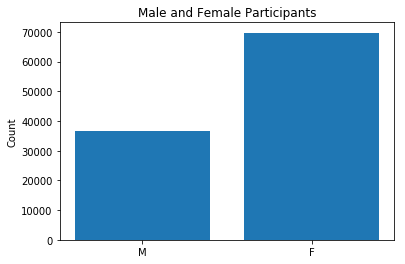

In [33]:
df_male=appoin_cleaned_df[appoin_cleaned_df['Gender']=='M'].shape[0]
df_female=appoin_cleaned_df[appoin_cleaned_df['Gender']=='F'].shape[0]

locations=[1,2]
heights=[df_male,df_female]
labels=['M','F']
plt.bar(locations,heights,tick_label=labels)
plt.title('Male and Female Participants')
plt.ylabel('Count')

**Answer: Females take care of their health more than the males as plot shows their participations compared to the males**

### Research Question 2  (Which gender place an appointement and Show/No-Show to the appointement the most?)

To answer this question we need to see the percentage of males who show/no-show to their appointements versus the females

In [34]:
# First I will create a crosstab using the Gender as row and the Show as column
Gender_Show=pd.crosstab(appoin_cleaned_df['Gender'],appoin_cleaned_df['Show'])
Gender_Show.head()

Show,0,1
Gender,,
F,14137,55562
M,7325,29337



**let's use Bar Chart for representation**

Text(0.5,1,'Male and Female Participants who show/no-show')

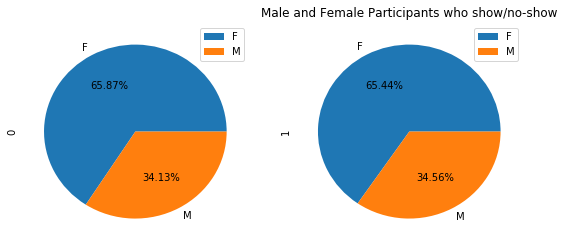

In [35]:
Gender_Show.plot.pie(subplots=True,figsize=(9,4),autopct='%.2f%%')
plt.title('Male and Female Participants who show/no-show')

**Answer: although the female cares the most to her health as we saw in the previous question, the participation of both gender in the show/ no-show is almost the same ratio.**

### Research Question 3  (Which month/weekday the most appointments are scheduled?)

To answer this question we need to examine the some plots for both columns: month and weekday with show column

Text(0.5,0,'Month')

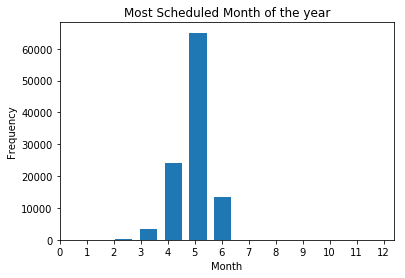

In [36]:
# Histogram Plot for the month
appoin_cleaned_df['Month_Scheduled'].plot(kind='hist',bins=12, xticks=np.arange(0,13,1),rwidth=0.7)
plt.title('Most Scheduled Month of the year')
plt.xlabel('Month')

**Answer: Month 5 shows the highest frequency time of the year the patients make appointements.**

Text(0,0.5,'Frequency')

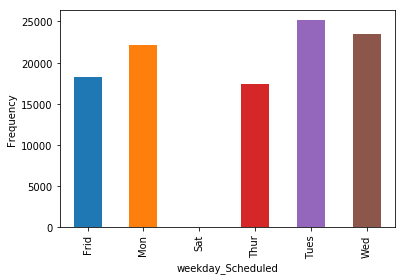

In [37]:
# Bar Plot for the Weekday
Weekday_df=appoin_cleaned_df.groupby('weekday_Scheduled').count()
Weekday_df['Age'].plot.bar() # pick any column you want, all will have same values from previous line
plt.ylabel('Frequency')

**Answer: Tuesday shows the highest frequency time of the week the patients make appointements.**

### Research Question 4  (Which month/weekday the most appointments are getting finalized with Show status?)

To answer this question we need to examine the some plots for both columns: month and weekday with show column

In [38]:
# First I will create a crosstab using the Month as row and the Show as column
Month_Show=pd.crosstab(appoin_cleaned_df['Month_Scheduled'],appoin_cleaned_df['Show'])
Month_Show

Show,0,1
Month_Scheduled,,
1,18,42
2,78,189
3,1140,2313
4,7493,16685
5,11355,53667
6,1359,11960
11,0,1
12,19,42


Text(0.5,1,'Participants who show/no-show during the year of 2016')

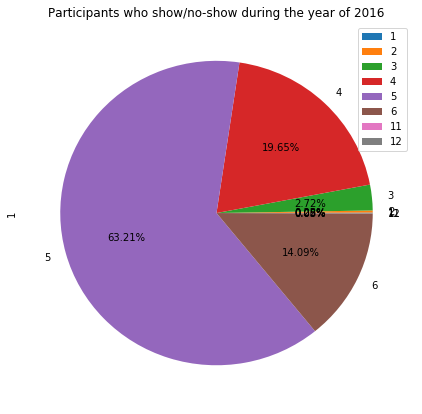

In [39]:
Month_Show.plot.pie(y=1,figsize=(7,7),autopct='%.2f%%')
plt.title('Participants who show/no-show during the year of 2016')

**Answer: by examining the pie chart with show = 1, we conclude that month 5 is the most period of the year patients went to their appointements followed by month 4**

In [40]:
# I will create a crosstab using the Month as row and the Show as column
Month_Show=pd.crosstab(appoin_cleaned_df['weekday_Scheduled'],appoin_cleaned_df['Show'])
Month_Show

Show,0,1
weekday_Scheduled,,
Frid,3742,14512
Mon,4369,17746
Sat,1,20
Thur,3544,13852
Tues,5085,20075
Wed,4721,18694


Text(0.5,1,'Participants who show/no-show during the year of 2016')

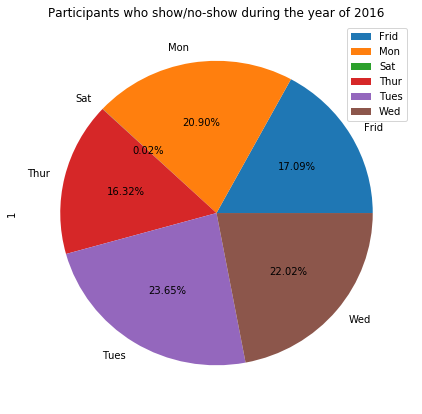

In [41]:
Month_Show.plot.pie(y=1,figsize=(7,7),autopct='%.2f%%')
plt.title('Participants who show/no-show during the year of 2016')

**Answer: by examining the pie chart with show = 1, we conclude that wednesday and tuesday are the most period of the week patients went to their appointements**

### Research Question 5  (Is there age difference in having a patient to be with Show/No-Show status?)

This one is a little tricky because the age column is categorical, discrete and not grouped as most of the columns we deal with.

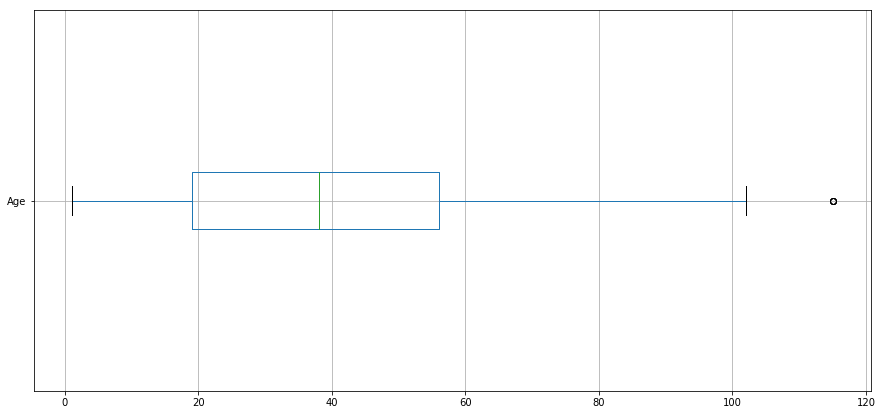

In [42]:
# First, we examine the Box Plot for the age column
appoin_cleaned_df.boxplot(column=['Age'],vert=False,figsize=(15,7))

From the box plot examination:
    <ol>
    <li>Some outliers exists</li>
    <li>Median Age is around 35 </li>
    <li>IQR is between 18 and 55 </li>
    
So, I will create groups of age with width 20 years old till age 100

In [43]:
# We will create 5 groups for the age column
groups_range=[1,20,40,60,80,100]
groups_label=['Max20','Max40','Max60','Max80','Max100']
appoin_cleaned_df['Age_groups']=pd.cut(appoin_cleaned_df['Age'],groups_range,labels=groups_label)
appoin_cleaned_df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show,Day_Scheduled,weekday_Scheduled,Month_Scheduled,Age_groups
0,F,2016-04-29 18:38:08,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1,29,Frid,4,Max80
1,M,2016-04-29 16:08:27,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1,29,Frid,4,Max60
2,F,2016-04-29 16:19:04,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,1,29,Frid,4,Max80
3,F,2016-04-29 17:29:31,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,29,Frid,4,Max20
4,F,2016-04-29 16:07:23,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,1,29,Frid,4,Max60


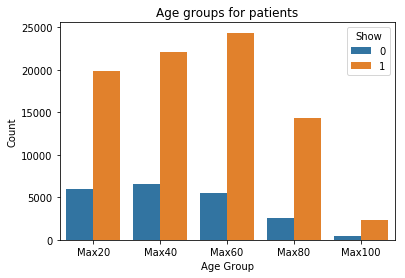

In [44]:
age_gp = sns.countplot(x = 'Age_groups', hue = 'Show', data = appoin_cleaned_df)
age_gp.set_title('Age groups for patients')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

**Answer: by examining the bar chart, we conclude:
    <ol>
    <li>Most of the patients with age(41 to 60) DID go to their appointements</li>
    <li>Most of the patients with age(21 to 40) DIDN'T go to their appointements</li>   
    <li>Groups of age(21 to 40) and (41 to 60) show the most percentage of patients who went to their appointements compared to other groups</li>**

### Research Question 6  (Does sending SMS affect the Show/No-Show status?)

To answer this question, we need to examine the bar plot of sms along with Show/No-Show status

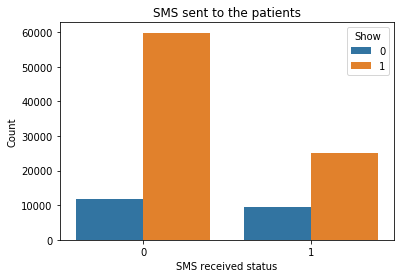

In [45]:
sms_recv = sns.countplot(x = 'SMS_received', hue = 'Show', data = appoin_cleaned_df)
sms_recv.set_title('SMS sent to the patients')
plt.xlabel('SMS received status')
plt.ylabel('Count')
plt.show()

**Answer: by examining the bar chart, we conclude:**
    <ol>
    <li>Patients who didn't receive any SMS and Show to their appointements are the most compared to the ones who received and Show</li>
    <li>Patients who didn't receive any SMS and DIDN'T show to their appointements are the most compared to the ones who received and DIDN'T show. This meaning that sending SMS helps to reduce the number of patients who didn't show to their apoointements by a small portion</li>

### Research Question 7  (Is the scholarship provided by the country affects the patient's life ?)

To answer this question, we need to examine the bar plot of the scholarship along with Show/No-Show status

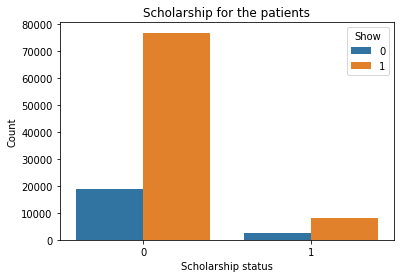

In [46]:
scholarship = sns.countplot(x = 'Scholarship', hue = 'Show', data = appoin_cleaned_df)
scholarship.set_title('Scholarship for the patients')
plt.xlabel('Scholarship status')
plt.ylabel('Count')
plt.show()

**Answer: by examining the bar chart, we conclude that this program doesn't affect the patient's life as the portion of patients who don't have this program went to their appointments more than the ones who have this program**

### Research Question 8  (Which **neighborhood**(hospital) is having the most reservations ?)

To Answer this question, I will try to get the count of each hospital's reservations

In [47]:
# Group by the Neighbourhood column, then count each hospital's reservations
Neighbourhood_Show=appoin_cleaned_df.groupby('Neighbourhood')['Show'].count().reset_index(name='count').sort_values(['count'], ascending=False)

Text(0.5,1,'Hospital reservations for year 2016')

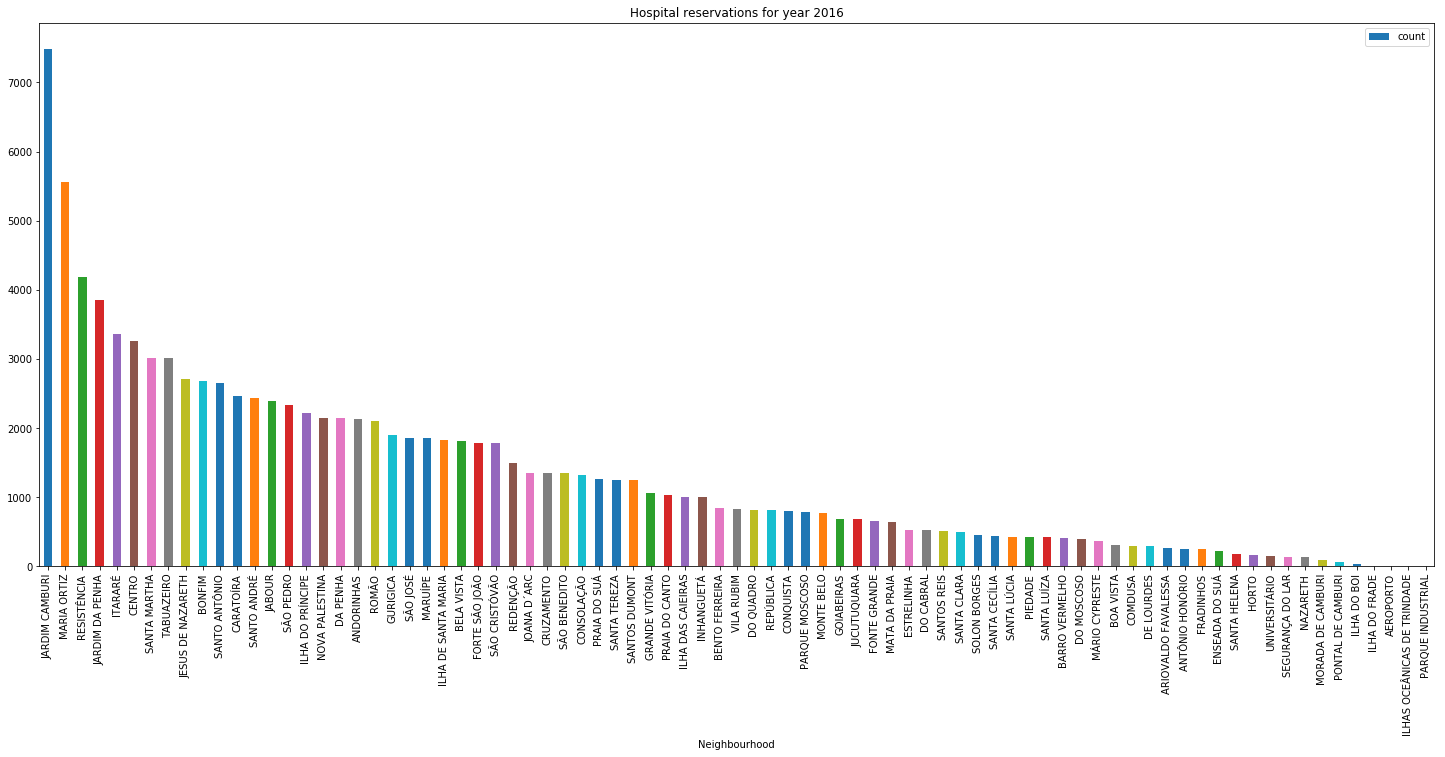

In [48]:
# Plot using bar plot
Neighbourhood_Show.plot.bar(x='Neighbourhood',y='count',figsize=(25,10))
plt.title('Hospital reservations for year 2016')

**Answer: by examining the bar chart, we conclude that hospital JARDIM CAMBURI has the most reservations**

### Research Question 9  (Which **neighborhood**(hospital) is having the most reservations with **Show** status ?)

This one is similar to the last question except that i will focus to present the highest hospital along with show = 1

In [49]:
# Group by the Neighbourhood column, then count each hospital's reservations having show =1
Neighbourhood_Show_1=appoin_cleaned_df.query('Show==1').groupby(['Neighbourhood'])['Show'].count().reset_index(name='count').sort_values(['count'], ascending=False)


Text(0.5,1,'Hospital reservations for year 2016')

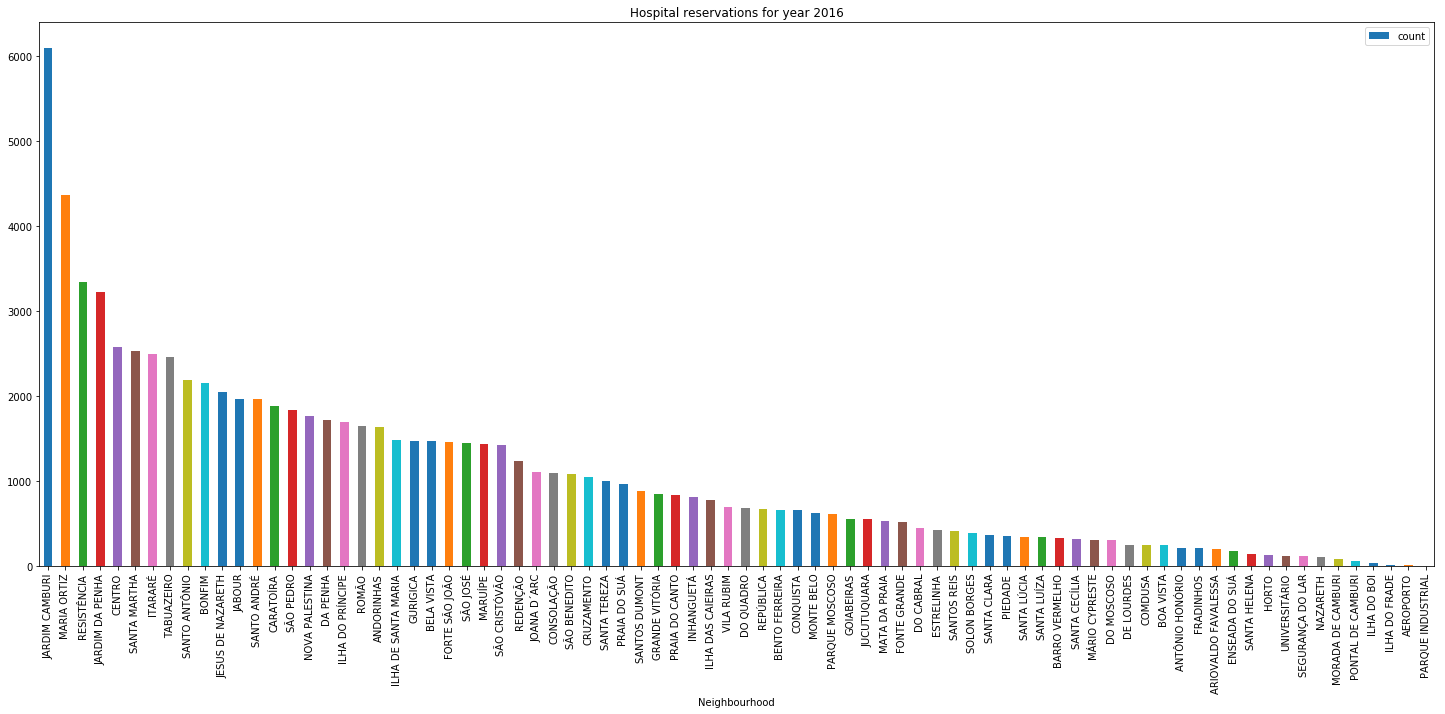

In [50]:
# Plot using bar plot
Neighbourhood_Show_1.plot.bar(x='Neighbourhood',y='count',figsize=(25,10))
plt.title('Hospital reservations for year 2016')

**Answer: by examining the bar chart, we conclude that hospital JARDIM CAMBURI has the most reservations with show=1(or the patients did go to their reservations)**

### Research Question 10  (Any specific **health condition** that makes the patient shows to the appointement ? )


Simply I am going to check (Hipertension, Diabetes, Handcap) patients with show=1 (they did go)

In [51]:
# Getting the number of patients with each disease along with they did go to their appointements 
Hipertension_Show=appoin_cleaned_df.query('Show==1 and Hipertension== 1').shape[0]
Diabetes_Show=appoin_cleaned_df.query('Show==1 and Diabetes== 1').shape[0]
Handcap_Show=appoin_cleaned_df.query('Show==1 and Handcap== 1').shape[0]


Text(0,0.5,'Count')

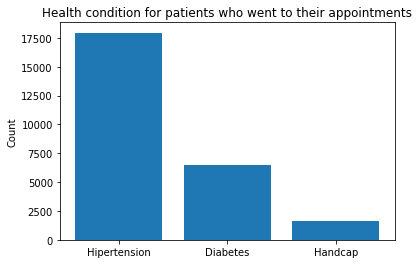

In [52]:
# Drrawing box plot for the last step
locations=[1,2,3]
heights=[Hipertension_Show,Diabetes_Show,Handcap_Show]
labels=['Hipertension','Diabetes','Handcap']
plt.bar(locations,heights,tick_label=labels)
plt.title('Health condition for patients who went to their appointments')
plt.ylabel('Count')

**Answer: as we can see most of the patients who did go to their reservations having Hipertension disease**

<a id='conclusions'></a>
## Conclusions

> **Limitations**:
    <ol>
    <li>The data contained only some months of the year, If there are complete full year data we can identify the months for physicians appointments</li>
      <li>if we have an extra column showing the number of times a SMS has been sent to the user, this could help us to predict the exact number of SMS to send as a remainder</li>
    <li>If we know the actual patient population from a particular neighborhood, then we can get a reason on why majority of the patients are coming from Jardim Camburi</li>

    
> **Summarization**:
     <ol>
    <li>Regarding question 11, from the inspection of our data we could say that Gender, Age, Neighbourhood, and Hypertension are some features that would help us determine if the patient who has taken an appointment will go or no</li>
      <li>From questions 1 and 2 : some health awareness programs should be given to address the men in order to check their health periodically as the women did  </li>
    <li>From questions 3 and 4 : during month 5 we need to have extra available doctors for the patients as this month have highest appointments   </li>
    <li>From question 5 : Most of the patients with age(41 to 60) went to their appointements however patients with age(21 to 40) didn't go to their appointements</li>
    <li>From question 6 : the SMS doesn't affect the process for showing or not as much as it was expected. This is one of the limitations</li>
      <li>From question 7 : the scholarship program needs some advertisement as the number of nonparticipating patients making appointments is much bigger than the ones who participate in the program</li>
      <li>From question 8 and 9 : the hospital JARDIM CAMBURI has the most reservations. This is one of the limitations </li>
    <li>From question 10 : the patients need to be aware of the hypertension disease, its causes, and how to avoid it</li>

In [53]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0